# Schritt 0: Installieren der erforderlichen Bibliotheken

In [1]:
# Importieren der benötigten Pakete
import pandas as pd  # Zum Verarbeiten von Daten in Tabellenform
import matplotlib.pyplot as plt  # Zur Erstellung von Diagrammen
import requests  # Zum Senden von HTTP-Anfragen
import ipywidgets as widgets  # Für interaktive Widgets in Jupyter Notebook
from IPython.display import display  # Zur Anzeige von Inhalten im Jupyter Notebook
import random  # Zur Generierung von Beispiel-Daten
from pptx import Presentation
from pptx.util import Inches
import io

# Abfrage von Nutzerdaten aus der API

In diesem Abschnitt werden wir Nutzerdaten von verschiedenen Endpunkten einer API abrufen und die Ergebnisse anzeigen.
## Schritt 1: Abrufen der Nutzerdaten von den verschiedenen Endpunkten

In [2]:
# Funktion zur Abfrage von Nutzerdaten von der API
def get_user_data(endpoint):
    # Die API-URL mit dem ausgewählten Endpoint erstellen
    url = f'https://diggov.nicogiessmann.com/api/1/{endpoint}/?format=json'
    response = requests.get(url)  # HTTP-Anfrage senden, um Daten abzurufen

    if response.status_code == 200:  # Wenn die Anfrage erfolgreich war (HTTP-Statuscode 200)
        data = response.json()  # JSON-Daten aus der Antwort extrahieren
        return data  # Die JSON-Daten zurückgeben
    else:
        return None  # Andernfalls None zurückgeben, um anzuzeigen, dass die Anfrage fehlgeschlagen ist

# Anleitung zur Auswahl des Endpunkts
# Schritt 2+: Auswertung
Verwenden Sie das Dropdown-Feld unten, um einen Endpunkt auszuwählen. Die Endpunkte 1 bis 5 entsprechen verschiedenen Szenarien oder Beobachtern. Wenn Sie einen Endpunkt auswählen, werden die zugehörigen Fragen und Antworten angezeigt, sowie ein Diagramm, das die Häufigkeit der gestellten Fragen darstellt.
Wählen Sie einen Endpunkt aus, um mehr über die jeweilige Situation zu erfahren.


In [3]:
# Funktion zur Aktualisierung der Anzeige basierend auf dem ausgewählten Endpoint
def update_data_view(selected_endpoint):
    endpoint_data = get_user_data(selected_endpoint)  # Nutzerdaten vom ausgewählten Endpoint abrufen
    df = pd.DataFrame(endpoint_data)  # JSON-Daten in ein Pandas DataFrame umwandeln

    # Anzeigen der Fragen und Antworten im Jupyter Notebook
    output.clear_output()  # Die Ausgabe im Jupyter Notebook leeren, um Platz für die neuen Daten zu schaffen
    with output:  # Mit "with output" werden die folgenden Ausgaben im Notebook angezeigt
        for index, row in df.iterrows():
            print(f"Frage {row['frage_id']}: {row['fragetext']}")
            print(f"Antwort: {row['antwortentwurf']}")
            print("-------------")

    # Grafische Darstellung der Fragenhäufigkeit im Jupyter Notebook
    plt.figure(figsize=(10, 6))
    df['fragetext'].value_counts().plot(kind='bar', title='Häufigkeit der Fragen')
    plt.xlabel('Fragen')
    plt.ylabel('Anzahl')
    plt.xticks(rotation=45)
    plt.show()

# Dropdown-Feld zur Auswahl des Endpunkts erstellen
endpoints = ['1', '2', '3', '4', '5']  # Die verfügbaren Endpunkte als Liste definieren
endpoint_dropdown = widgets.Dropdown(options=endpoints, description='Endpoint auswählen:')  # Dropdown-Feld erstellen
output = widgets.Output()  # Widget für die Ausgabe erstellen

# Interaktive Anzeige aktualisieren, wenn ein neuer Endpoint ausgewählt wird
widgets.interactive(update_data_view, selected_endpoint=endpoint_dropdown)

# Die Ausgabe und das Dropdown-Feld im Jupyter Notebook anzeigen
display(endpoint_dropdown)  # Dropdown-Feld anzeigen
display(output)  # Ausgabe anzeigen

Dropdown(description='Endpoint auswählen:', options=('1', '2', '3', '4', '5'), value='1')

Output()

# Fortsetzung der Auswertung

In [4]:
# Beispiel-Daten generieren (Diese Daten sollten durch Ihre echten Daten ersetzt werden)
data = {
    'Frage': ['Frage 1', 'Frage 2', 'Frage 3', 'Frage 4', 'Frage 5'],
    'Ja': [random.randint(0, 100) for _ in range(5)],  # Beispielwerte für "Ja"
    'Nein': [random.randint(0, 100) for _ in range(5)],  # Beispielwerte für "Nein"
    'Likert_Skala': [random.randint(1, 5) for _ in range(5)],  # Beispielwerte für Likert-Skala (1-5)
    'Prozentsatz': [random.uniform(0, 100) for _ in range(5)]  # Beispielwerte für Prozentsatz
}

In [5]:
# DataFrame erstellen
df = pd.DataFrame(data)

# Eine leere Liste erstellen, um DataFrames für die Diagramme zu speichern
diagram_dataframes = []

# Abschnitt 1: Ja/Nein-Diagramm
ja_nein_dataframe = df[['Frage', 'Ja', 'Nein']].copy()
diagram_dataframes.append(ja_nein_dataframe)

# Abschnitt 2: Likert-Skala-Diagramm
likert_dataframe = df[['Frage', 'Likert_Skala']].copy()
diagram_dataframes.append(likert_dataframe)

# Abschnitt 3: Prozentsatz-Diagramm
prozentsatz_dataframe = df[['Frage', 'Prozentsatz']].copy()
diagram_dataframes.append(prozentsatz_dataframe)

# Abschnitt 4: Beispiel-Diagramm
abschnitt_4_dataframe = df[['Frage', 'Ja', 'Nein']].copy()  # Beispiel-Daten
diagram_dataframes.append(abschnitt_4_dataframe)

# Abschnitt 5: Beispiel-Diagramm
abschnitt_5_dataframe = df[['Frage', 'Likert_Skala']].copy()  # Beispiel-Daten
diagram_dataframes.append(abschnitt_5_dataframe)

# Abschnitt 6: Beispiel-Diagramm
abschnitt_6_dataframe = df[['Frage', 'Prozentsatz']].copy()  # Beispiel-Daten
diagram_dataframes.append(abschnitt_6_dataframe)

# Abschnitt 7: Beispiel-Diagramm
abschnitt_7_dataframe = df[['Frage', 'Ja', 'Nein']].copy()  # Beispiel-Daten
diagram_dataframes.append(abschnitt_7_dataframe)

# Abschnitt 8: Beispiel-Diagramm
abschnitt_8_dataframe = df[['Frage', 'Likert_Skala']].copy()  # Beispiel-Daten
diagram_dataframes.append(abschnitt_8_dataframe)

# Abschnitt 9: Beispiel-Diagramm
abschnitt_9_dataframe = df[['Frage', 'Prozentsatz']].copy()  # Beispiel-Daten
diagram_dataframes.append(abschnitt_9_dataframe)

# Abschnitt 10: Beispiel-Diagramm
abschnitt_10_dataframe = df[['Frage', 'Ja', 'Nein']].copy()  # Beispiel-Daten
diagram_dataframes.append(abschnitt_10_dataframe)

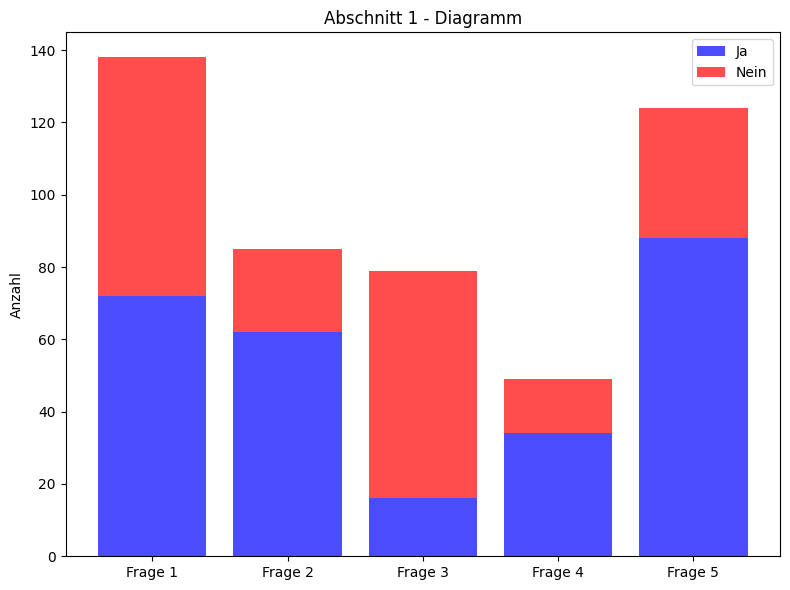

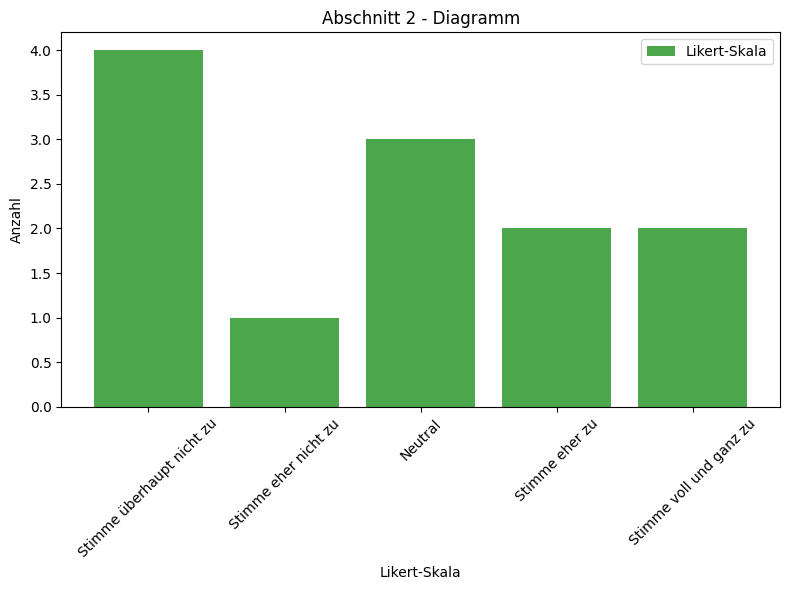

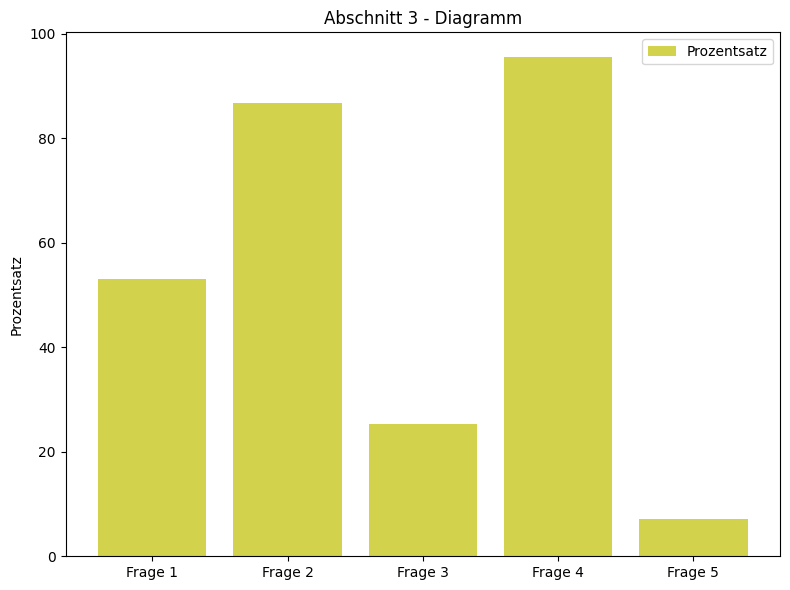

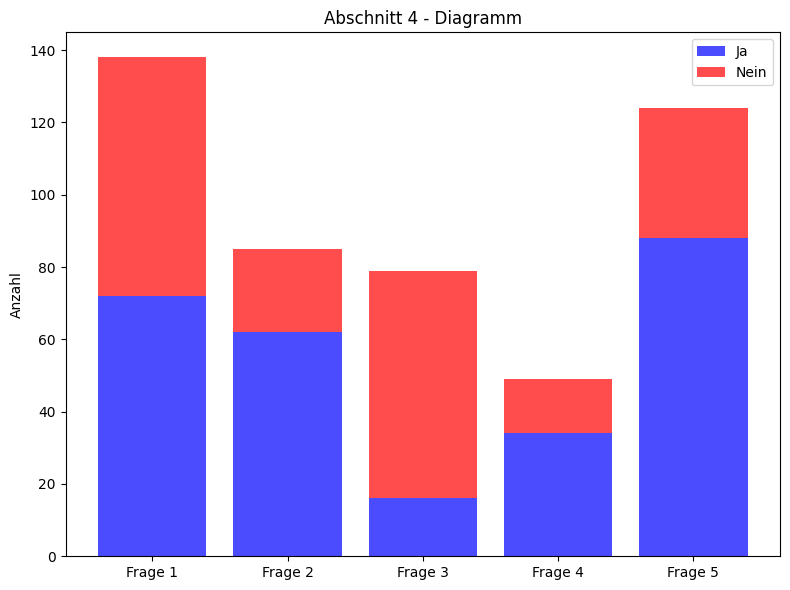

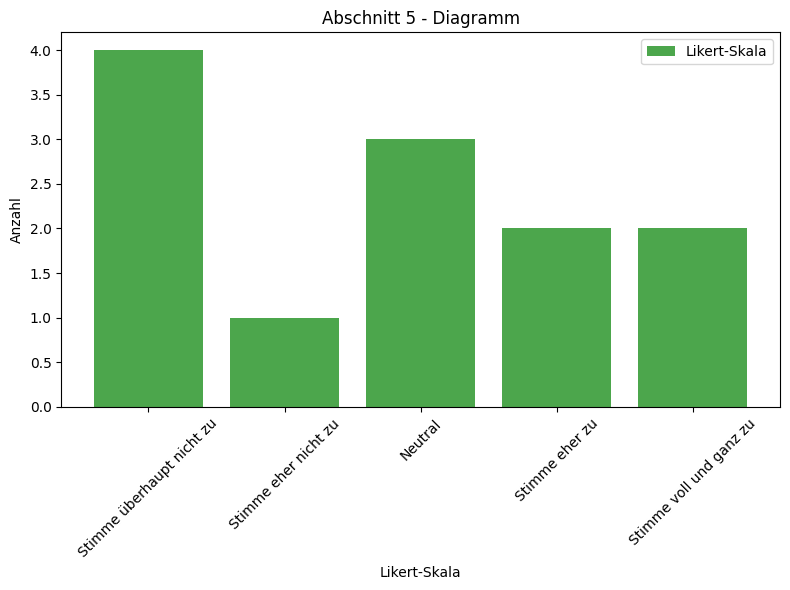

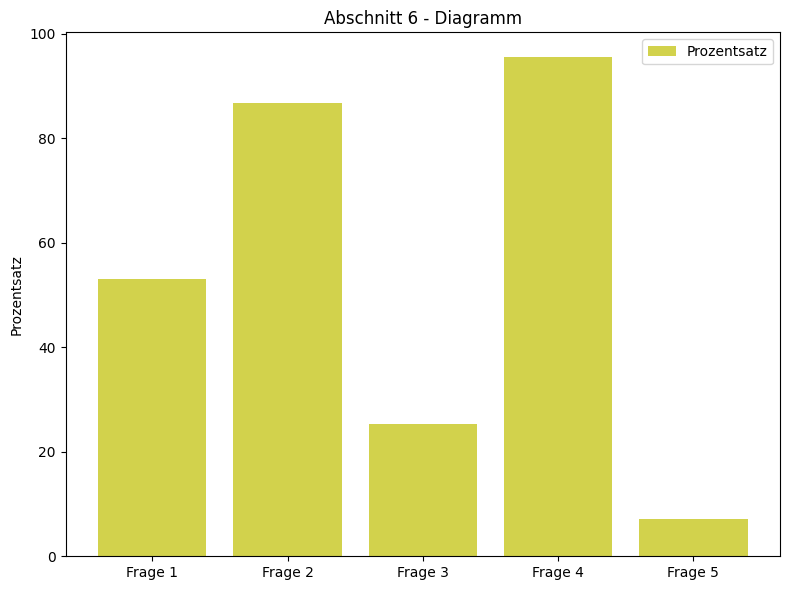

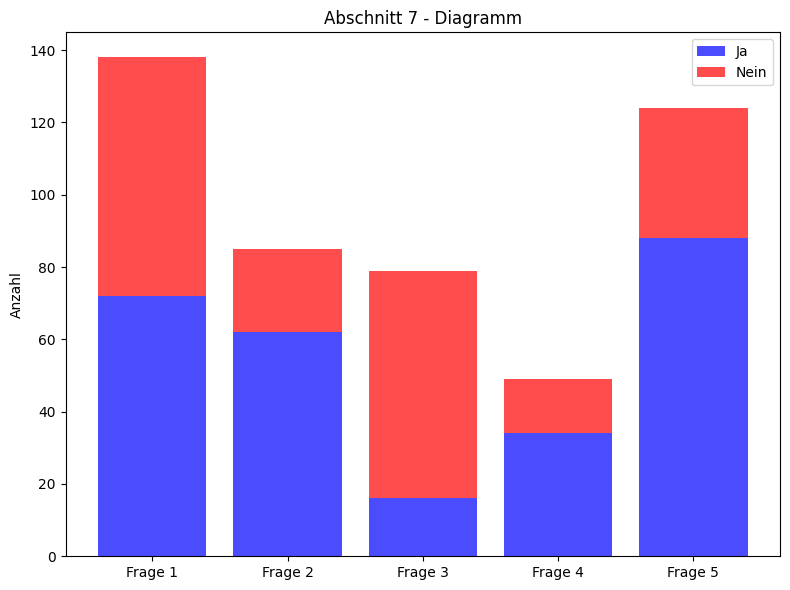

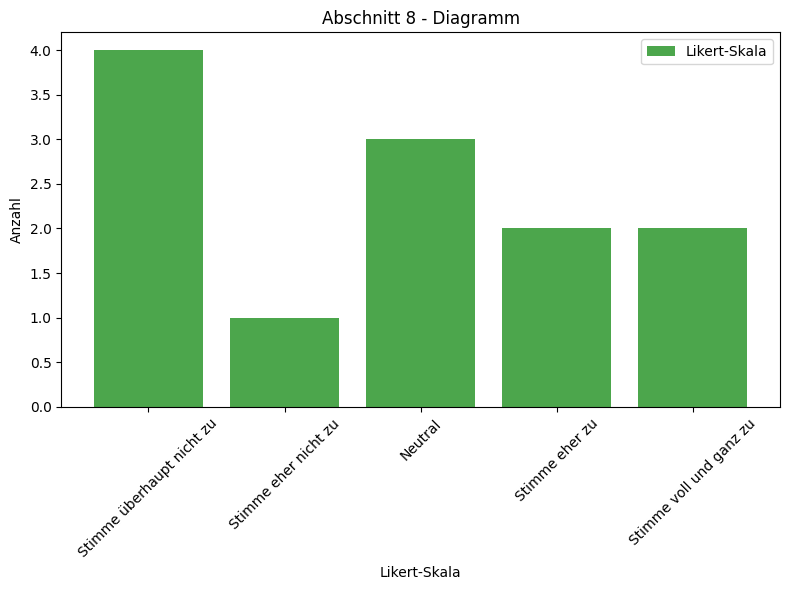

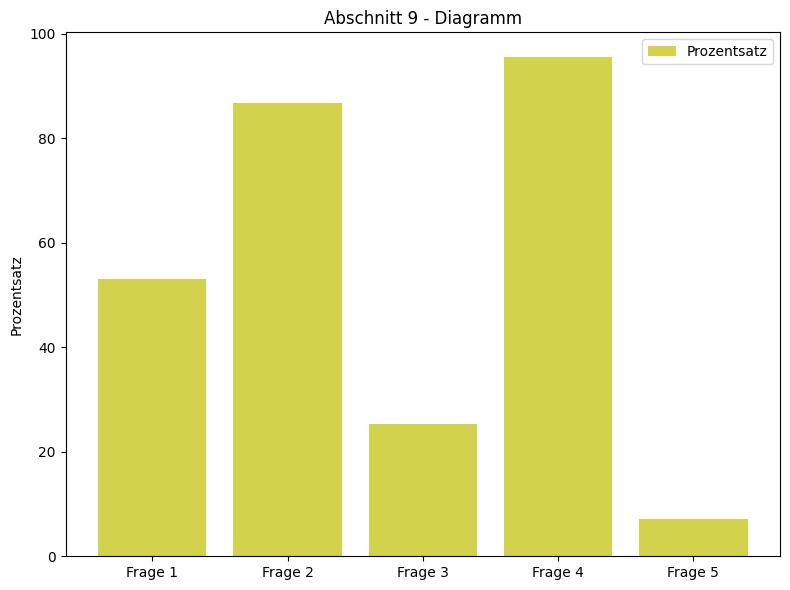

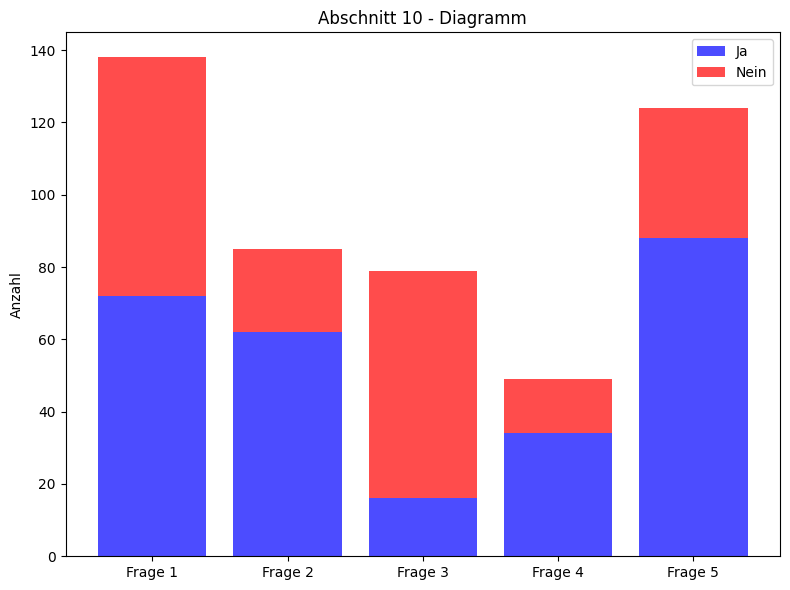

In [6]:
# Visualisieren aller Abschnitte
for idx, df in enumerate(diagram_dataframes):
    plt.figure(figsize=(8, 6))

    if 'Ja' in df.columns and 'Nein' in df.columns:
        # Ja/Nein-Diagramm
        plt.bar(df['Frage'], df['Ja'], label='Ja', color='b', alpha=0.7)
        plt.bar(df['Frage'], df['Nein'], label='Nein', color='r', alpha=0.7, bottom=df['Ja'])
        plt.ylabel('Anzahl')
    elif 'Likert_Skala' in df.columns:
        # Likert-Skala-Diagramm
        likert_labels = ['Stimme überhaupt nicht zu', 'Stimme eher nicht zu', 'Neutral', 'Stimme eher zu', 'Stimme voll und ganz zu']
        likert_scores = [1, 2, 3, 4, 5]

        # Die Likert-Skala entsprechend der Spalte 'Likert_Skala' beschriften
        plt.bar(likert_scores, df['Likert_Skala'], color='g', alpha=0.7, label='Likert-Skala')
        plt.xlabel('Likert-Skala')
        plt.ylabel('Anzahl')
        plt.xticks(likert_scores, likert_labels, rotation=45)
    elif 'Prozentsatz' in df.columns:
        # Prozentsatz-Diagramm
        plt.bar(df['Frage'], df['Prozentsatz'], color='y', alpha=0.7, label='Prozentsatz')
        plt.ylabel('Prozentsatz')

    plt.title(f'Abschnitt {idx + 1} - Diagramm')
    plt.legend()  # Legende hinzufügen
    plt.tight_layout()
    plt.show()

In [7]:
# Funktion zum Erstellen einer Folie mit einem Diagramm
def create_chart_slide(prs, chart_data, section_title):
    slide_layout = prs.slide_layouts[5]  # 5 entspricht Titel und Inhalt mit Diagramm
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    title.text = section_title

    left = Inches(0.5)
    top = Inches(1.5)
    width = Inches(6)
    height = Inches(3.5)

    # Erstellen Sie ein Diagramm mit Matplotlib
    fig, ax = plt.subplots()
    categories, values = chart_data
    ax.bar(categories, values)
    ax.set_xlabel('Kategorien')
    ax.set_ylabel('Werte')
    ax.set_title(section_title)

    # Speichern Sie das Matplotlib-Diagramm in ein BytesIO-Objekt
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Fügen Sie das Diagramm als Bild zur Präsentation hinzu
    slide.shapes.add_picture(buffer, left, top, width=width, height=height)

    buffer.close()
    plt.close()

# Erstellen einer neuen Präsentation
prs = Presentation()

# Diagramm-Daten für Abschnitt 1 (Beispiel)
section_1_chart_data = (
    ['Ja', 'Nein'],
    [5, 10]
)
create_chart_slide(prs, section_1_chart_data, "Abschnitt 1")

# Diagramm-Daten für Abschnitt 2 (Beispiel)
section_2_chart_data = (
    ['Ja', 'Nein'],
    [8, 7]
)
create_chart_slide(prs, section_2_chart_data, "Abschnitt 2")

# Speichern der Präsentation
prs.save("example.pptx")

# Aktualisieren der Präsentation für Abschnitt 3 bis 10 (Beispiel)
prs = Presentation("example.pptx")

# Diagramm-Daten für Abschnitt 3 (Beispiel)
section_3_chart_data = (
    ['Ja', 'Nein'],
    [3, 12]
)
create_chart_slide(prs, section_3_chart_data, "Abschnitt 3")

# Diagramm-Daten für Abschnitt 4 (Beispiel)
section_4_chart_data = (
    ['Ja', 'Nein'],
    [7, 8]
)
create_chart_slide(prs, section_4_chart_data, "Abschnitt 4")

# Diagramm-Daten für Abschnitt 5 (Beispiel)
section_5_chart_data = (
    ['Ja', 'Nein'],
    [6, 9]
)
create_chart_slide(prs, section_5_chart_data, "Abschnitt 5")

# Diagramm-Daten für Abschnitt 6 (Beispiel)
section_6_chart_data = (
    ['Ja', 'Nein'],
    [4, 11]
)
create_chart_slide(prs, section_6_chart_data, "Abschnitt 6")

# Diagramm-Daten für Abschnitt 7 (Beispiel)
section_7_chart_data = (
    ['Ja', 'Nein'],
    [9, 6]
)
create_chart_slide(prs, section_7_chart_data, "Abschnitt 7")

# Diagramm-Daten für Abschnitt 8 (Beispiel)
section_8_chart_data = (
    ['Ja', 'Nein'],
    [5, 10]
)
create_chart_slide(prs, section_8_chart_data, "Abschnitt 8")

# Diagramm-Daten für Abschnitt 9 (Beispiel)
section_9_chart_data = (
    ['Ja', 'Nein'],
    [8, 7]
)
create_chart_slide(prs, section_9_chart_data, "Abschnitt 9")

# Diagramm-Daten für Abschnitt 10 (Beispiel)
section_10_chart_data = (
    ['Ja', 'Nein'],
    [3, 12]
)
create_chart_slide(prs, section_10_chart_data, "Abschnitt 10")

# Speichern der aktualisierten Präsentation
prs.save("updated_example.pptx")